In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN, Bidirectional, LSTM, Activation, SpatialDropout1D
from keras.optimizers import Adam
from keras.datasets import imdb
from keras.callbacks import  TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
max_features = 5000
no_classes = 1
max_length = 500
batch_size = 32
embedding_size = 32
dropout_rate = 0.4
no_epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (25000,)
y_train: (25000,)


In [5]:
print(x_train[7])
print(y_train[7])

[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 2, 2343, 4804, 2, 2, 2, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 2, 37, 9, 150, 4, 2, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 2, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 2, 799, 2, 2, 588, 84, 11, 4, 3231, 152, 339, 2, 42, 4869, 2, 2, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 2, 2, 17, 4, 2, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 2, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 2, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 2, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 2, 61, 602, 120, 45, 2, 6, 320, 786, 99, 196, 2, 786, 2, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 3231, 45, 853, 2029, 8, 30, 6, 117, 430, 19, 6, 2, 9, 

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[7]])
print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? the ? tells the story of the four hamilton ? teenager francis ? ? ? ? joseph ? ? ? ? the ? david ? who is now the ? parent in charge the ? move house a lot ? is ? why is unhappy with the way things are the fact that his ? sister ? ? murder people in the basement doesn't help ? or calm ? ? either francis ? something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell ? ? ? as the ? brothers who's only other film director's credit so far is the april ? day ? remake enough said this was one of the ? to die ? at the 2006 after dark ? or whatever it's called in keeping with pretty much all the ? i've seen i thought the ? was complete total utter crap i found the character's really poor very ? the slow moving story failed to capture my imagination or ? my interest over it's ? a half minute too long ? minute ? the there's the awful twist at

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

print(x_train[7])
print(x_train.shape)

[   4 3231  152  339    2   42 4869    2    2  345 4804    2  142   43
  218  208   54   29  853  659   46    4  882  183   80  115   30    4
  172  174   10   10 1001  398 1001 1055  526   34 3717    2    2    2
   17    4    2 1094  871   64   85   22 2030 1109   38  230    9    4
 4324    2  251    2 1034  195  301   14   16   31    7    4    2    8
  783    2   33    4 2945  103  465    2   42  845   45  446   11 1895
   19  184   76   32    4    2  207  110   13  197    4    2   16  601
  964 2152  595   13  258    4 1730   66  338   55    2    4  550  728
   65 1196    8 1839   61 1546   42    2   61  602  120   45    2    6
  320  786   99  196    2  786    2    4  225    4  373 1009   33    4
  130   63   69   72 1104   46 1292  225   14   66  194    2 1703   56
    8  803 1004    6    2  155   11    4    2 3231   45  853 2029    8
   30    6  117  430   19    6    2    9   15   66  424    8 2337  178
    9   15   66  424    8 1465  178    9   15   66  142   15    9  424
    8 

In [8]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [9]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)

(5000, 500)
(20000, 500)
(5000,)
(20000,)


In [10]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, embedding_size, input_length=max_length))
LSTM_model.add(SpatialDropout1D(dropout_rate))
LSTM_model.add(Bidirectional(LSTM(16,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001),dropout=0.2, recurrent_dropout=0.2)))
LSTM_model.add(Dense(16,activation="relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
LSTM_model.add(Dropout(dropout_rate))
LSTM_model.add(Activation('relu'))
LSTM_model.add(Dropout(dropout_rate))
LSTM_model.add(Dense(1))

LSTM_model.add(Dense(no_classes, activation='sigmoid'))

In [11]:
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 500, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0

In [12]:

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01, amsgrad=False)
LSTM_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

tensorboard = TensorBoard('./logs/SimpleRNN')
LSTM_model.save("myRNNSimplemodel.h5")

history = LSTM_model.fit(partial_x_train, partial_y_train, batch_size=batch_size, verbose=2, epochs=no_epochs, validation_data=(x_val, y_val), shuffle=True,callbacks = [tensorboard])

Epoch 1/20
625/625 - 253s - loss: 0.7515 - accuracy: 0.5306 - val_loss: 0.7203 - val_accuracy: 0.6164
Epoch 2/20
625/625 - 245s - loss: 0.6419 - accuracy: 0.7053 - val_loss: 0.5593 - val_accuracy: 0.8182
Epoch 3/20
625/625 - 251s - loss: 0.5762 - accuracy: 0.7703 - val_loss: 0.5081 - val_accuracy: 0.8328
Epoch 4/20
625/625 - 245s - loss: 0.5469 - accuracy: 0.7858 - val_loss: 0.4844 - val_accuracy: 0.8400
Epoch 5/20
625/625 - 244s - loss: 0.5277 - accuracy: 0.7975 - val_loss: 0.4697 - val_accuracy: 0.8416
Epoch 6/20
625/625 - 243s - loss: 0.5185 - accuracy: 0.8029 - val_loss: 0.4737 - val_accuracy: 0.8380
Epoch 7/20
625/625 - 244s - loss: 0.5129 - accuracy: 0.8042 - val_loss: 0.4523 - val_accuracy: 0.8430
Epoch 8/20
625/625 - 242s - loss: 0.5047 - accuracy: 0.8099 - val_loss: 0.4458 - val_accuracy: 0.8478
Epoch 9/20
625/625 - 242s - loss: 0.4994 - accuracy: 0.8119 - val_loss: 0.4405 - val_accuracy: 0.8494
Epoch 10/20
625/625 - 242s - loss: 0.4927 - accuracy: 0.8150 - val_loss: 0.4356 - 

In [13]:
results = LSTM_model.evaluate(x_test, y_test)

782/782 [==============================] - 85s 108ms/step - loss: 0.4049 - accuracy: 0.8581


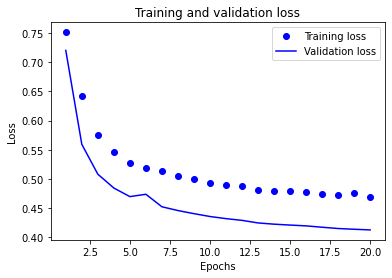

In [14]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

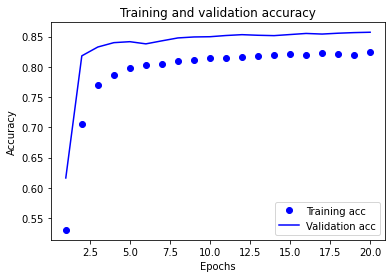

In [15]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
prediction = LSTM_model.predict(x_test)

In [98]:
y_pred = (prediction > 0.5)

from sklearn.metrics import f1_score


print('F1-score: {0}'.format(f1_score(y_pred, y_test)))



F1-score: 0.8609935746748157


In [104]:
import pandas as pd

pred = np.round(y_pred).astype(int)

pred = np.array(pred)
target = np.array(y_test)

df = pd.DataFrame(list(zip(target, pred)), columns = ['Target', 'Pred']) 
df.to_csv('final_preds.csv', index=False)
df.tail()


,Target,Pred
24995,1.0,[1]
24996,1.0,[1]
24997,0.0,[0]
24998,0.0,[0]
24999,0.0,[1]
